In [1]:
import numpy as np
import pandas as pd

## scikit-learn
- https://scikit-learn.org/stable/
- Today, we will cover ...
    - How to prepare your data
    - How to split the data into training + test sets
    - How to fit your model (e.g. k-NN)
    - How to evaluate your model
- First, we will start from a classification problem

## Iris Classification using k-NN
### (1) Load Iris Dataset 

In [2]:
# load dataset
from sklearn.datasets import load_iris
iris = load_iris() # dict type

In [3]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
iris.data.shape

(150, 4)

In [5]:
# we will convert it to DataFrame
df = pd.DataFrame(iris.data,columns=iris.feature_names)

In [6]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
df.shape

(150, 4)

In [8]:
df['target'] = iris.target

In [9]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [10]:
df.to_csv('data_iris.csv',index=False)

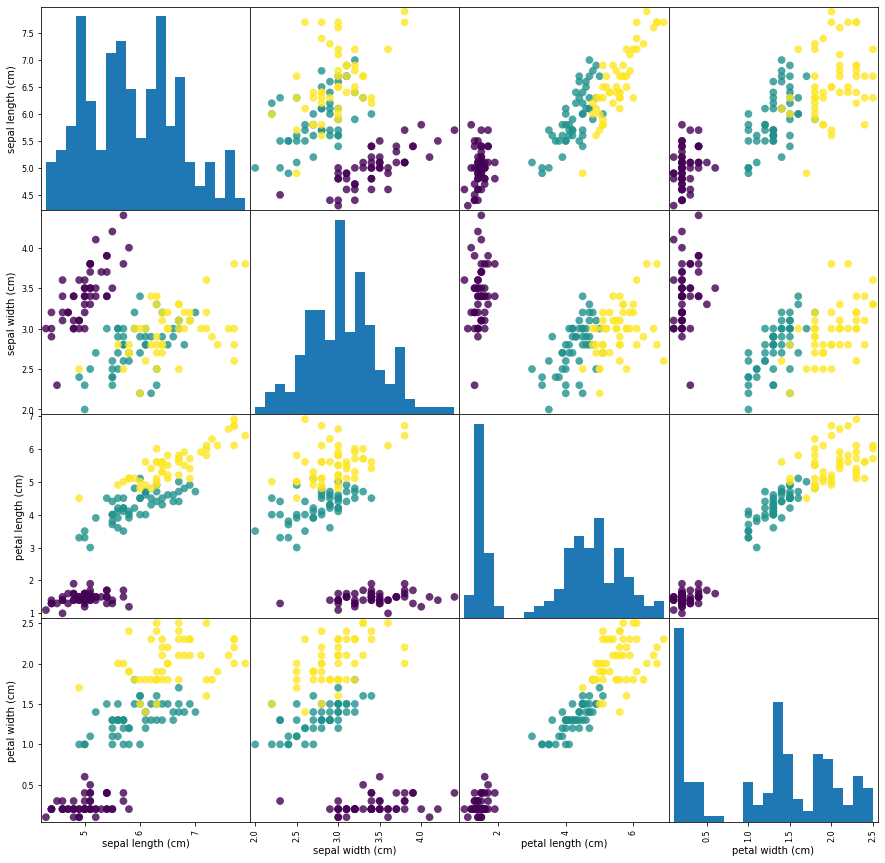

In [11]:
fig = pd.plotting.scatter_matrix(df.iloc[:,:4], c=df['target'], figsize=(15, 15), marker='o', hist_kwds={'bins': 20}, s=60, alpha=.8)

### (2) Split the data

In [12]:
X = df.iloc[:,:4]
y = df['target']

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=1030)

In [14]:
X_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
63,6.1,2.9,4.7,1.4
107,7.3,2.9,6.3,1.8
101,5.8,2.7,5.1,1.9
2,4.7,3.2,1.3,0.2
136,6.3,3.4,5.6,2.4
...,...,...,...,...
25,5.0,3.0,1.6,0.2
56,6.3,3.3,4.7,1.6
144,6.7,3.3,5.7,2.5
49,5.0,3.3,1.4,0.2


### (3) Build a k-NN classifier

In [15]:
from sklearn.neighbors import KNeighborsClassifier
# Define the model
clf = KNeighborsClassifier(n_neighbors=3)

In [16]:
# Learn/Fit/Train the model
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

### (4) Test and Evaluate the classifier

In [17]:
# Make Prediction on the train set 
y_train_hat = clf.predict(X_train)

# Make Prediction on the test set
y_test_hat = clf.predict(X_test)

In [18]:
# Evaluate the model
from sklearn.metrics import accuracy_score
print('Train accuracy : %.4f'% accuracy_score(y_train,y_train_hat))
print('Test accuracy : %.4f'% accuracy_score(y_test,y_test_hat))

Train accuracy : 0.9643
Test accuracy : 0.9737


### (4)-2 Another way to evaluate the classifier (only for accuracy)

In [19]:
print('Train accuracy : %.4f'% clf.score(X_train, y_train))
print('Test accuracy : %.4f'% clf.score(X_test, y_test))

Train accuracy : 0.9643
Test accuracy : 0.9737
